In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set()
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from collections import  Counter
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
data = pd.read_csv('BBC News.csv')
data.head(5)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [8]:
data.Category.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

remove stop words

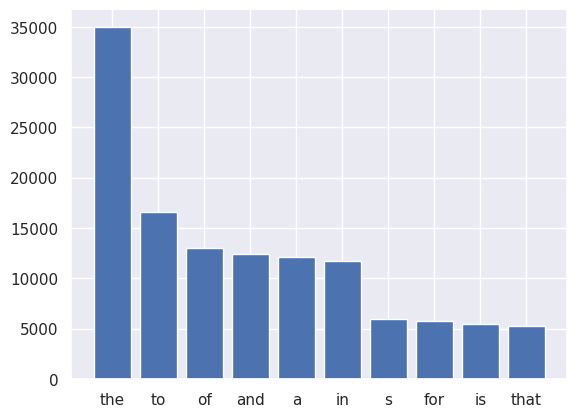

In [9]:
def plot_stopwords(data1):
    stop=set(stopwords.words('english'))
    data_split= data1.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in stop:
            dictionary_stopwords[word]+=1

    top=sorted(dictionary_stopwords.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)
plot_stopwords(data['Text'])

counting most frequesnt words

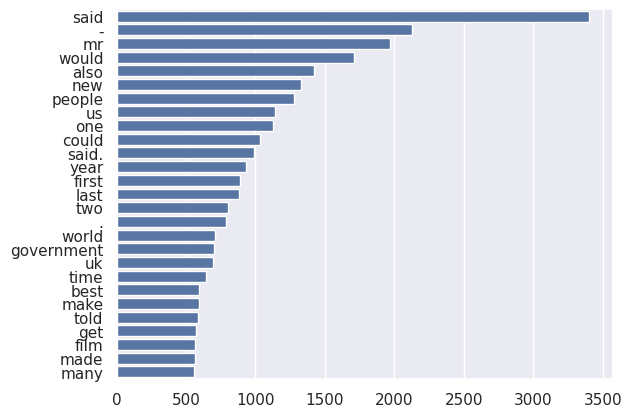

In [12]:
def top_frequent_words(data1):
    stop=set(stopwords.words('english'))
    data_split= data1.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    counter=Counter(corpus)
    mostCommon=counter.most_common()
    x, y=[], []
    for word,count in mostCommon[:100]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x)
top_frequent_words(data['Text'])

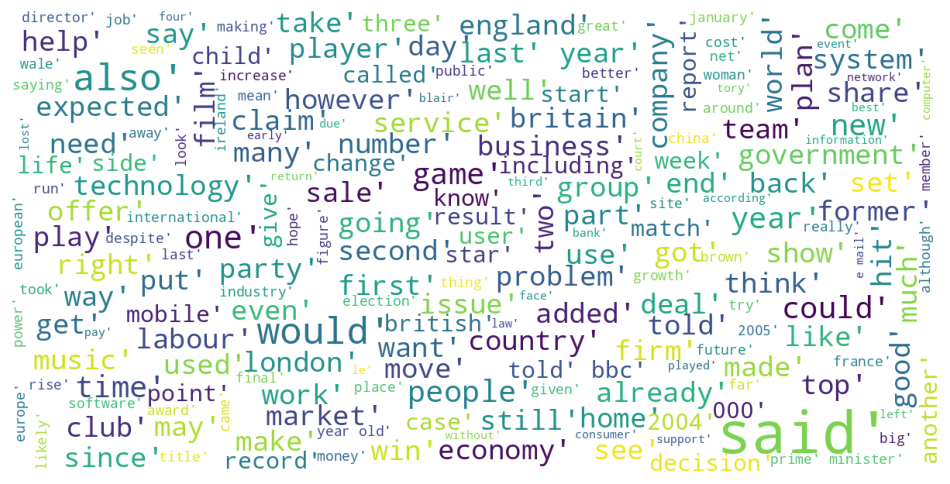

In [13]:
def plot_wordcloud(data):
    stop=set(stopwords.words('english'))
    def _preprocess_text(data):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in data:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus

    corpus=_preprocess_text(data)

    wordcloud = WordCloud(

          background_color='white',
        stopwords=set(STOPWORDS),
        max_words=200,
        max_font_size=25,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
plot_wordcloud(data['Text'])

plotting positive, negative, neutral sentiment

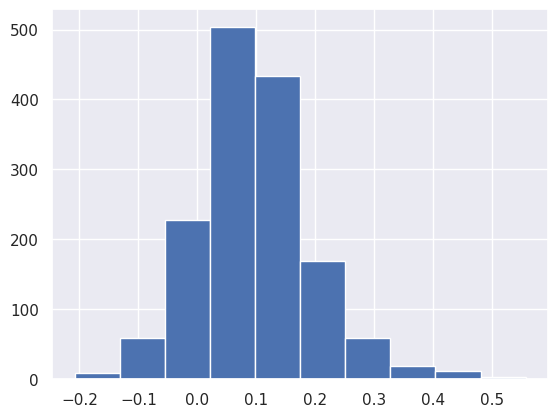

In [14]:
from textblob import TextBlob
def polarity_histo(data):

    def check_semantics(data):
        return TextBlob(data).sentiment.polarity

    polarity_val =data.apply(lambda a : check_semantics(a))
    polarity_val.hist()
polarity_histo(data['Text'])

data cleaning

In [16]:
def cleaning(bbc_text):
  if len(bbc_text)==1:
      word_tokens = word_tokenize(bbc_text)
  else:
      print('Wait! Data is getting cleaned...')
      # Tokenize : dividing Sentences into words
      bbc_text['text_clean'] = data['Text'].apply(nltk.word_tokenize)
      print('Step 1-Tokenization Done!.')
      print(bbc_text.head(5))

  # Remove stop words
  if len(data)==1:
      stop_words = set(stopwords.words('english'))
      filtered_sentence = [w for w in word_tokens if not w in stop_words]
      filtered_sentence = []
      for w in word_tokens:
          if w not in stop_words:
             filtered_sentence.append(w)
  else:
      stop_words=set(nltk.corpus.stopwords.words("english"))
      data['text_clean'] = data['text_clean'].apply(lambda x: [item for item in x if item not in stop_words])
      print('Step 2-All stop words are removed from the list.')
      print(data.head(5))
  #Will keep words and remove numbers and special characters
  if len(data)!=1:
      regex = '[a-z]+'
      data['text_clean'] = data['text_clean'].apply(lambda x: [char for char in x if re.match(regex, char)])
      print('Step3-Numbers and Special Characters are removed.')
      print(data.head(5))

cleaning(data)

Wait! Data is getting cleaned...
Step 1-Tokenization Done!.
   ArticleId                                               Text  Category  \
0       1833  worldcom ex-boss launches defence lawyers defe...  business   
1        154  german business confidence slides german busin...  business   
2       1101  bbc poll indicates economic gloom citizens in ...  business   
3       1976  lifestyle  governs mobile choice  faster  bett...      tech   
4        917  enron bosses in $168m payout eighteen former e...  business   

                                          text_clean  
0  [worldcom, ex-boss, launches, defence, lawyers...  
1  [german, business, confidence, slides, german,...  
2  [bbc, poll, indicates, economic, gloom, citize...  
3  [lifestyle, governs, mobile, choice, faster, b...  
4  [enron, bosses, in, $, 168m, payout, eighteen,...  
Step 2-All stop words are removed from the list.
   ArticleId                                               Text  Category  \
0       1833  worldco

In [17]:
print(len(data))
def detokenize(data):
  for i in range(len(data)):
    data_w = data['text_clean'][i]
    a=TreebankWordDetokenizer().detokenize(data_w)
    data.at[i,'text_clean']=a
detokenize(data)

1490


In [18]:
print(data['text_clean'])

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens maj...
3       lifestyle governs mobile choice faster better ...
4       enron bosses payout eighteen former enron dire...
                              ...                        
1485    double eviction big brother model caprice holb...
1486    dj double act revamp chart show dj duo jk joel...
1487    weak dollar hits reuters revenues media group ...
1488    apple ipod family expands market apple expande...
1489    santy worm makes unwelcome visit thousands web...
Name: text_clean, Length: 1490, dtype: object


In [20]:
data.Category = data.Category.map({'tech':0, 'business':1, 'sport':2, 'entertainment':3, 'politics':4})
data.Category.unique()

array([1, 0, 4, 2, 3])

In [22]:
data.isnull().sum()

ArticleId     0
Text          0
Category      0
text_clean    0
dtype: int64

split data in testing and training sets

In [23]:
X = data.text_clean
y = data.Category
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state = 1)

count vectorization

In [24]:
vector = CountVectorizer(stop_words = 'english',lowercase=False)
# fit the vectorizer on the training data
vector.fit(X_train)
# print(len(vector.get_feature_names()))
vector.vocabulary_
X_transformed = vector.transform(X_train)
# print(X_transformed.toarray())
X_transformed.toarray()
# for test data
X_test_transformed = vector.transform(X_test)
print(X_test_transformed.toarray)

<bound method _cs_matrix.toarray of <596x18593 sparse matrix of type '<class 'numpy.int64'>'
	with 75478 stored elements in Compressed Sparse Row format>>


Logistic Regression

In [25]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_transformed, y_train)

LogisticRegression()

In [26]:
LogisticRegression()

LogisticRegression()

In [27]:
# fit
logistic_reg.fit(X_transformed,y_train)

# predict class
y_predicted = logistic_reg.predict(X_test_transformed)

# predict probabilities
y_pred_probability = logistic_reg.predict_proba(X_test_transformed)

In [28]:
metrics.accuracy_score(y_test, y_predicted)

0.9681208053691275

confusion matrix

In [29]:
confusion_mat = metrics.confusion_matrix(y_test, y_predicted)
print(confusion_mat)
TrueNeg = confusion_mat[0, 0]
TruePos = confusion_mat[1, 1]
FalseNeg = confusion_mat[1, 0]
FalsePos = confusion_mat[0, 1]
sensitivity = TruePos / float(FalseNeg + TruePos)
print("sensitivity",sensitivity)

specificity = TrueNeg / float(TrueNeg + FalsePos)
print("specificity",specificity)

[[107   1   2   0   0]
 [  3 116   0   0   3]
 [  0   0 137   0   0]
 [  0   0   2 111   2]
 [  0   3   3   0 106]]
sensitivity 0.9747899159663865
specificity 0.9907407407407407


In [30]:
PRECISION_SCORE = metrics.precision_score(y_test, y_predicted, average = 'micro')
RECALL_SCORE = metrics.recall_score(y_test, y_predicted, average = 'micro')
F1_SCORE =metrics.f1_score(y_test, y_predicted, average = 'micro')

print("PRECISION SCORE :",PRECISION_SCORE)
print("RECALL SCORE :",RECALL_SCORE)
print("F1 SCORE :",F1_SCORE)

PRECISION SCORE : 0.9681208053691275
RECALL SCORE : 0.9681208053691275
F1 SCORE : 0.9681208053691275


using naive bayes classifier to classify text

In [31]:
naivebayes = MultinomialNB()
naivebayes.fit(X_transformed, y_train)

MultinomialNB()

In [32]:
MultinomialNB()


MultinomialNB()

In [34]:
naivebayes.fit(X_transformed,y_train)
# predict class
y_predict = naivebayes.predict(X_test_transformed)
# predict probabilities
y_pred_probability = naivebayes.predict_proba(X_test_transformed)

In [35]:

metrics.accuracy_score(y_test, y_predict)

0.9731543624161074

In [36]:
metrics.confusion_matrix(y_test, y_predict)

array([[109,   0,   1,   0,   0],
       [  4, 114,   0,   0,   4],
       [  0,   0, 137,   0,   0],
       [  4,   0,   0, 110,   1],
       [  0,   2,   0,   0, 110]])

In [37]:
confusion = metrics.confusion_matrix(y_test, y_predict)
print(confusion)
TrueNeg = confusion_mat[0, 0]
TruePos = confusion_mat[1, 1]
FalseNeg = confusion_mat[1, 0]
FalsePos = confusion_mat[0, 1]
sensitivity = TruePos / float(FalseNeg + TruePos)
print("sensitivity",sensitivity)

specificity = TrueNeg / float(TrueNeg + FalsePos)
print("specificity",specificity)

[[109   0   1   0   0]
 [  4 114   0   0   4]
 [  0   0 137   0   0]
 [  4   0   0 110   1]
 [  0   2   0   0 110]]
sensitivity 0.9747899159663865
specificity 0.9907407407407407


In [38]:
PRECISION_SCORE = metrics.precision_score(y_test, y_predicted, average = 'micro')
RECALL_SCORE = metrics.recall_score(y_test, y_predicted, average = 'micro')
F1_SCORE =metrics.f1_score(y_test, y_predicted, average = 'micro')

print("PRECISION SCORE :",PRECISION_SCORE)
print("RECALL SCORE :",RECALL_SCORE)
print("F1 SCORE :",F1_SCORE)

PRECISION SCORE : 0.9681208053691275
RECALL SCORE : 0.9681208053691275
F1 SCORE : 0.9681208053691275


In [39]:
headlineA = ['India has surpassed Hong Kong to become the fourth-largest equity market globally, with the combined value of shares listed on Indian exchanges reaching $4.33 trillion compared to Hong Kong’s $4.29 trillion.']
vec1 = vector.transform(headlineA).toarray()
print('Headline:' ,headlineA)
print(str(list(naivebayes.predict(vec1))[0]).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','POLITICS'))

Headline: ['India has surpassed Hong Kong to become the fourth-largest equity market globally, with the combined value of shares listed on Indian exchanges reaching $4.33 trillion compared to Hong Kong’s $4.29 trillion.']
BUSINESS


In [45]:
headlineB = ['FA Cup: Pep Guardiolas Manchester City look to end bizarre losing run at Tottenham in marquee clash']
vec2 = vector.transform(headlineB).toarray()
print('Headline:' ,headlineB)
print(str(list(naivebayes.predict(vec2))[0]).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','POLITICS'))

Headline: ['FA Cup: Pep Guardiolas Manchester City look to end bizarre losing run at Tottenham in marquee clash']
SPORTS


In [50]:
headlineC = ['Amid dating rumours, Tara poses with Kartik in inside pic from birthday bash']
vec3 = vector.transform(headlineC).toarray()
print('Headline:', headlineC)
print(str(list(naivebayes.predict(vec3))[0]).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','POLITICS'))

Headline: ['Amid dating rumours, Tara poses with Kartik in inside pic from birthday bash']
ENTERTAINMENT
